# Comparison with market data

In [1]:
import numpy as np
from frh_fx import mpl, nig, frh, uts, blk
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
mpl.config(scale=1.5,print_keys=False)

In [3]:
date = '20180523'
T,Δ1B,σ1B = uts.import_data(date,'EURUSD','BID')
T,Δ1A,σ1A = uts.import_data(date,'EURUSD','ASK')
T,Δ2B,σ2B = uts.import_data(date,'USDJPY','BID')
T,Δ2A,σ2A = uts.import_data(date,'USDJPY','ASK')
T,Δ3B,σ3B = uts.import_data(date,'EURJPY','BID')
T,Δ3A,σ3A = uts.import_data(date,'EURJPY','ASK')

In [4]:
k1B = uts.convert_deltas(T,Δ1B,σ1B)
k1A = uts.convert_deltas(T,Δ1A,σ1A)
k2B = uts.convert_deltas(T,Δ2B,σ2B)
k2A = uts.convert_deltas(T,Δ2A,σ2A)
k3B = uts.convert_deltas(T,Δ3B,σ3B)
k3A = uts.convert_deltas(T,Δ3A,σ3A)
# correct ATM k = 0
for k in [k1B,k1A,k2B,k2A,k3B,k3A]:
    k[:,2] = 0
# flip USDJPY to JPYUSD
# should instead implement
# product measure change
for k in [k2B,k2A]:
    k *= -1

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


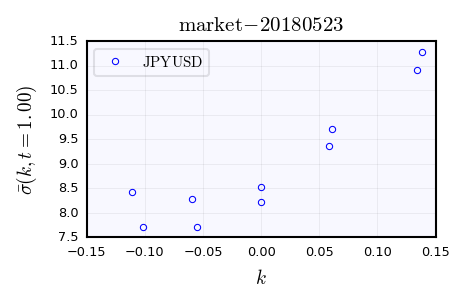

In [5]:
i = -1 # maturity slice
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
# axes.plot(k1B[i,:],100*σ1B[i,:],'ro')
# axes.plot(k1A[i,:],100*σ1A[i,:],'ro')
axes.plot(k2B[i,:],100*σ2B[i,:],'bo')
axes.plot(k2A[i,:],100*σ2A[i,:],'bo')
# axes.plot(k3B[i,:],100*σ3B[i,:],'go')
# axes.plot(k3A[i,:],100*σ3A[i,:],'go')
# axes.legend([r'$\mathrm{EURUSD}$'])
axes.legend([r'$\mathrm{JPYUSD}$'])
# axes.legend([r'$\mathrm{EURJPY}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

First consider $T=1$Y

In [6]:
σ1,ρ1 = 0.081,-0.08
σ2,ρ2 = 0.092,+0.35
γ = 1
ρ = 0.43

In [7]:
α1,β1,δ1,μ1 = frh.nig_params(σ1,ρ1,γ)
α2,β2,δ2,μ2 = frh.nig_params(σ2,ρ2,γ)

In [8]:
θ1 = α1,β1,δ1
θ2 = α2,β2,δ2
α3,β3,δ3,μ3 = nig.cross_params(θ1,θ2,ρ)
θ3 = α3,β3,δ3

In [9]:
T = np.array([1])
# corresponding data maturity slice
i = -1 
k = uts.get_logstrikes(T,Δ=0.01,n=25)

In [10]:
P1 = nig.price(k,T,θ1)
P2 = nig.price(k,T,θ2)
P3 = nig.price(k,T,θ3)

In [11]:
BS1 = blk.surface(k,T,P1)
BS2 = blk.surface(k,T,P2)
BS3 = blk.surface(k,T,P3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


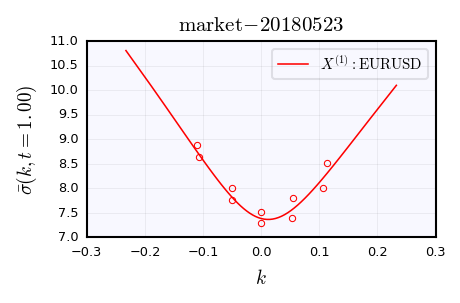

In [12]:
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
axes.plot(k[i,:],100*BS1[i,:],'r')
axes.plot(k1B[i,:],100*σ1B[i,:],'ro')
axes.plot(k1A[i,:],100*σ1A[i,:],'ro')
axes.legend([r'$X^{(1)}:\mathrm{EURUSD}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


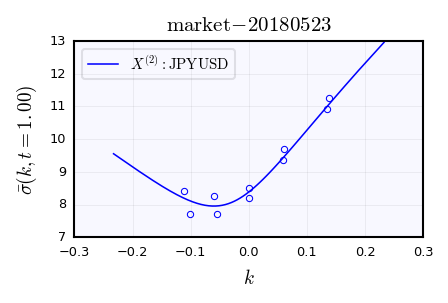

In [13]:
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
axes.plot(k[i,:],100*BS2[i,:],'b')
axes.plot(k2B[i,:],100*σ2B[i,:],'bo')
axes.plot(k2A[i,:],100*σ2A[i,:],'bo')
axes.legend([r'$X^{(2)}:\mathrm{JPYUSD}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


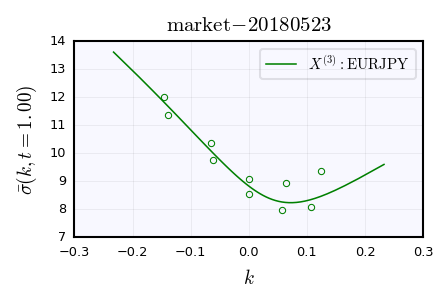

In [14]:
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
axes.plot(k[i,:],100*BS3[i,:],'g')
axes.plot(k3B[i,:],100*σ3B[i,:],'go')
axes.plot(k3A[i,:],100*σ3A[i,:],'go')
axes.legend([r'$X^{(3)}:\mathrm{EURJPY}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

Clearly scipy.optimize could do better.

In [15]:
uts.save_data(k,T,BS3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/data/20180524-095923


Now for $T=1$M

In [16]:
σ1,ρ1 = 0.0818,-0.3
σ2,ρ2 = 0.076,+0.39
γ = 0.14
ρ = 0.58

In [17]:
α1,β1,δ1,μ1 = frh.nig_params(σ1,ρ1,γ)
α2,β2,δ2,μ2 = frh.nig_params(σ2,ρ2,γ)

In [18]:
θ1 = α1,β1,δ1
θ2 = α2,β2,δ2
α3,β3,δ3,μ3 = nig.cross_params(θ1,θ2,ρ)
θ3 = α3,β3,δ3

In [19]:
T = np.array([1/12])
# corresponding data maturity slice
i = 0 
k = uts.get_logstrikes(T,Δ=0.01,n=25)

In [20]:
P1 = nig.price(k,T,θ1)
P2 = nig.price(k,T,θ2)
P3 = nig.price(k,T,θ3)

In [21]:
BS1 = blk.surface(k,T,P1)
BS2 = blk.surface(k,T,P2)
BS3 = blk.surface(k,T,P3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


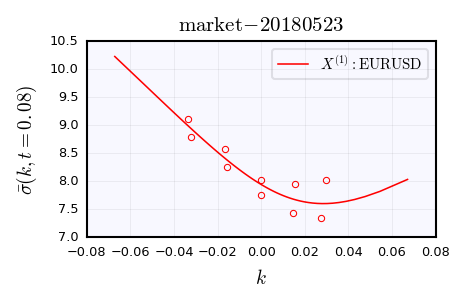

In [26]:
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
axes.plot(k[i,:],100*BS1[i,:],'r')
axes.plot(k1B[i,:],100*σ1B[i,:],'ro')
axes.plot(k1A[i,:],100*σ1A[i,:],'ro')
axes.legend([r'$X^{(1)}:\mathrm{EURUSD}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


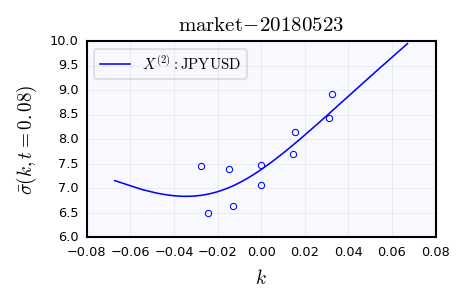

In [23]:
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
axes.plot(k[i,:],100*BS2[i,:],'b')
axes.plot(k2B[i,:],100*σ2B[i,:],'bo')
axes.plot(k2A[i,:],100*σ2A[i,:],'bo')
axes.legend([r'$X^{(2)}:\mathrm{JPYUSD}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


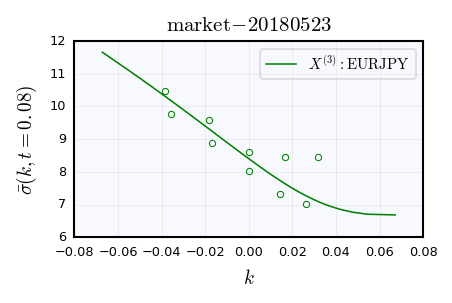

In [24]:
plot,axes = plt.subplots()
axes.set_title(r'$\mathrm{market\! -\! %s}$'%date)
axes.plot(k[i,:],100*BS3[i,:],'g')
axes.plot(k3B[i,:],100*σ3B[i,:],'go')
axes.plot(k3A[i,:],100*σ3A[i,:],'go')
axes.legend([r'$X^{(3)}:\mathrm{EURJPY}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T[i])
uts.save_plot()

In [25]:
uts.save_data(k,T,BS3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/data/20180524-095927
